In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [132]:
df=pd.read_csv("/Users/prince/Downloads/water-treatment (1).csv")
df.head(10)

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,D-2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5
5,D-7/3/90,38572,3,7.8,202,372,186,68.8,4.5,1644,...,1764,?,59.7,96.5,86.7,78.3,90.1,73.1,84.9,100
6,D-8/3/90,41115,6,7.8,?,552,262,64.1,5,1603,...,1703,?,61.9,93.8,89.1,79.8,?,86.2,90.1,99
7,D-9/3/90,36107,5,7.7,215,489,334,40.7,6,1613,...,1606,?,70.4,95.6,90.6,53.7,92.1,66.9,94.6,100
8,D-11/3/90,29156,2.5,7.7,206,451,194,69.1,4.5,1249,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,D-12/3/90,39246,2,7.8,172,506,200,69,5,1865,...,1616,21.2,59.7,90.8,88.4,66.1,89,69,86.5,99.6


In [133]:
df.tail()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
522,D-26/8/91,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,?,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,D-27/8/91,33535,0.32,7.8,192,346,172,68.6,4,988,...,950,?,58.3,97.8,83,59.1,91.1,74.6,90.7,100
524,D-28/8/91,32922,0.3,7.4,139,367,180,64.4,3,1060,...,1136,?,65,97.1,76.2,66.4,82,77.1,88.9,99
525,D-29/8/91,32190,0.3,7.3,200,545,258,65.1,4,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87,89.5,99.8
526,D-30/8/91,30488,0.21,7.5,152,300,132,69.7,?,1073,...,1224,?,69.5,?,81.7,76.4,?,81.7,86.4,?


In [134]:
df.columns

Index(['Date', ' Q-E', 'ZN-E ', 'PH-E ', 'DBO-E', 'DQO-E ', 'SS-E', 'SSV-E',
       'SED-E', 'COND-E', ' PH-P', 'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P',
       'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D ', 'SED-D', 'COND-D', 'PH-S',
       'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
       'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', ' RD-DBO-G', 'RD-DQO-G',
       'RD-SS-G', 'RD-SED-G'],
      dtype='object')

In [135]:
df.iloc[:,0]

0       D-1/3/90
1       D-2/3/90
2       D-4/3/90
3       D-5/3/90
4       D-6/3/90
         ...    
522    D-26/8/91
523    D-27/8/91
524    D-28/8/91
525    D-29/8/91
526    D-30/8/91
Name: Date, Length: 527, dtype: object

In [136]:
columns= df.columns

# Cleansing

In [137]:
df.isna().sum()

Date         0
 Q-E         0
ZN-E         0
PH-E         0
DBO-E        0
DQO-E        0
SS-E         0
SSV-E        0
SED-E        0
COND-E       0
 PH-P        0
DBO-P        0
SS-P         0
SSV-P        0
SED-P        0
COND-P       0
PH-D         0
DBO-D        0
DQO-D        0
SS-D         0
SSV-D        0
SED-D        0
COND-D       0
PH-S         0
DBO-S        0
DQO-S        0
SS-S         0
SSV-S        0
SED-S        0
COND-S       0
RD-DBO-P     0
RD-SS-P      0
RD-SED-P     0
RD-DBO-S     0
RD-DQO-S     0
 RD-DBO-G    0
RD-DQO-G     0
RD-SS-G      0
RD-SED-G     0
dtype: int64

In [138]:
df.shape

(527, 39)

In [139]:
df.iloc[:,0]=df.iloc[:,0].astype('category')
df.iloc[:,0]=df.iloc[:,0].cat.codes

In [140]:
df.replace("?",np.nan, inplace=True)

In [141]:
df

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,7,44101,1.5,7.8,NaN,407,166,66.3,4.5,2110,...,2000,NaN,58.8,95.5,NaN,70,NaN,79.4,87.3,99.6
1,198,39024,3,7.7,NaN,443,214,69.2,6.5,2660,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,428,32229,5,7.6,NaN,528,186,69.9,3.4,1666,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,444,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,462,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,NaN,62.7,95.6,NaN,71,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,329,32723,0.16,7.7,93,252,176,56.8,2.3,894,...,942,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
523,346,33535,0.32,7.8,192,346,172,68.6,4,988,...,950,NaN,58.3,97.8,83,59.1,91.1,74.6,90.7,100
524,363,32922,0.3,7.4,139,367,180,64.4,3,1060,...,1136,NaN,65,97.1,76.2,66.4,82,77.1,88.9,99
525,380,32190,0.3,7.3,200,545,258,65.1,4,1260,...,1326,39.8,65.9,97.1,81.7,70.9,89.5,87,89.5,99.8


In [142]:
df.dropna(inplace=True)

In [143]:
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)
df.head()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,444,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
1,40,29156,2.5,7.7,206,451,194,69.1,4.5,1249,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
2,57,39246,2,7.8,172,506,200,69,5,1865,...,1616,21.2,59.7,90.8,88.4,66.1,89,69,86.5,99.6
3,74,42393,0.7,7.9,189,478,230,67,5.5,1410,...,1575,0.6,45.8,92,11.6,25.7,19.6,36,43,36.4
4,161,40923,3.5,7.6,146,329,188,57.4,2.5,1300,...,1545,32.7,33.3,90,82.6,61.3,87,71.4,78.2,99.2


# Standardisation

In [144]:
scaler = StandardScaler()


In [145]:
df.dtypes

Date           int16
 Q-E          object
ZN-E          object
PH-E         float64
DBO-E         object
DQO-E         object
SS-E          object
SSV-E         object
SED-E         object
COND-E         int64
 PH-P        float64
DBO-P         object
SS-P           int64
SSV-P         object
SED-P         object
COND-P         int64
PH-D         float64
DBO-D         object
DQO-D         object
SS-D          object
SSV-D         object
SED-D         object
COND-D         int64
PH-S          object
DBO-S         object
DQO-S         object
SS-S          object
SSV-S         object
SED-S         object
COND-S        object
RD-DBO-P      object
RD-SS-P       object
RD-SED-P      object
RD-DBO-S      object
RD-DQO-S      object
 RD-DBO-G     object
RD-DQO-G      object
RD-SS-G       object
RD-SED-G      object
dtype: object

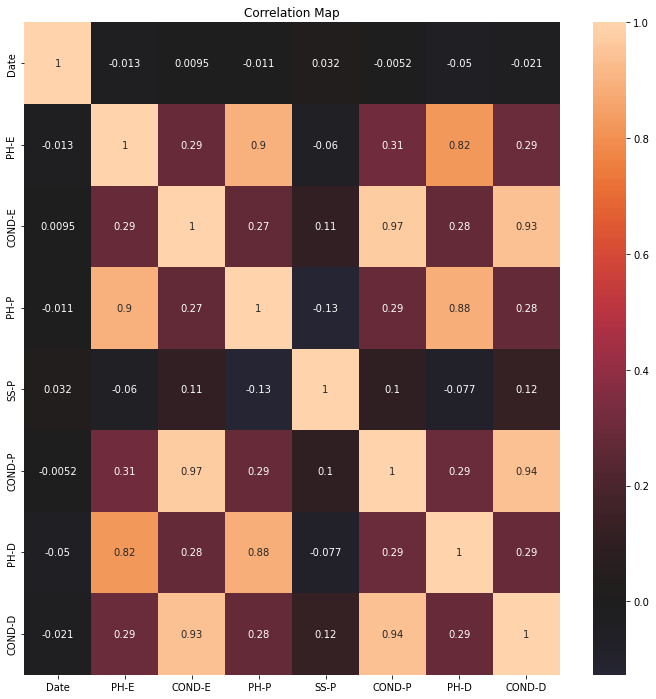

In [147]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [149]:
df1 = scaler.fit_transform(df)

In [150]:
df.dtypes

Date           int16
 Q-E          object
ZN-E          object
PH-E         float64
DBO-E         object
DQO-E         object
SS-E          object
SSV-E         object
SED-E         object
COND-E         int64
 PH-P        float64
DBO-P         object
SS-P           int64
SSV-P         object
SED-P         object
COND-P         int64
PH-D         float64
DBO-D         object
DQO-D         object
SS-D          object
SSV-D         object
SED-D         object
COND-D         int64
PH-S          object
DBO-S         object
DQO-S         object
SS-S          object
SSV-S         object
SED-S         object
COND-S        object
RD-DBO-P      object
RD-SS-P       object
RD-SED-P      object
RD-DBO-S      object
RD-DQO-S      object
 RD-DBO-G     object
RD-DQO-G      object
RD-SS-G       object
RD-SED-G      object
dtype: object

In [151]:
df1

array([[ 1.19294867, -0.3432405 ,  0.52578544, ...,  0.48170336,
        -0.00212193,  0.2079139 ],
       [-1.44210471, -1.20065815,  0.09577841, ..., -0.55266831,
         0.09661278,  0.06250172],
       [-1.33122375,  0.27391899, -0.11922511, ..., -1.13678407,
        -0.51225126,  0.11097245],
       ...,
       [-0.01369706, -1.35673827, -0.89323776, ...,  0.81026848,
         0.11306856,  0.2079139 ],
       [ 0.09066149, -1.39327388, -0.92333825, ...,  0.15313825,
        -0.08440085,  0.2079139 ],
       [ 0.77551447, -0.75726201, -0.85023706, ...,  1.05365005,
        -0.01857771,  0.15944317]])

In [156]:
df1=df[[' Q-E', 'ZN-E ', 'PH-E ', 'DBO-E' ,'DQO-E ' ,'SS-E' ,'SSV-E','SED-E','COND-E']]
df1.head()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E
0,35023,3.5,7.9,205,588,192,65.6,4.5,2430
1,29156,2.5,7.7,206,451,194,69.1,4.5,1249
2,39246,2,7.8,172,506,200,69,5,1865
3,42393,0.7,7.9,189,478,230,67,5.5,1410
4,40923,3.5,7.6,146,329,188,57.4,2.5,1300


In [158]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(df1)
XE_scaled_array = scaler.transform(df1)
XE_scaled = pd.DataFrame(XE_scaled_array, columns = df1.columns)
XE_scaled.sample(5)

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E
270,-0.488068,-0.549232,1.585884,0.544452,0.560994,-0.515637,0.904914,0.280369,-0.319094
17,0.174834,-0.678234,1.585884,0.707602,0.866857,-0.193392,0.462010,0.693583,0.568751
54,0.035561,-0.463231,-0.106914,0.152890,0.000246,0.044052,-0.589886,0.108197,-0.403045
236,1.649265,-0.248227,-0.530113,-1.919126,-1.902899,-0.888764,-0.922064,-0.752666,-1.217114
135,0.071658,1.170796,-0.953312,-0.711810,-1.367639,-0.532598,-0.281435,-0.511624,-0.949998


In [159]:
# K-Means Clustering
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
seed = 0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(XE_scaled)
# predict the cluster for each data point
yE_cluster_kmeans = km.predict(XE_scaled)
yE_cluster_kmeans

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0,
       2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 2,

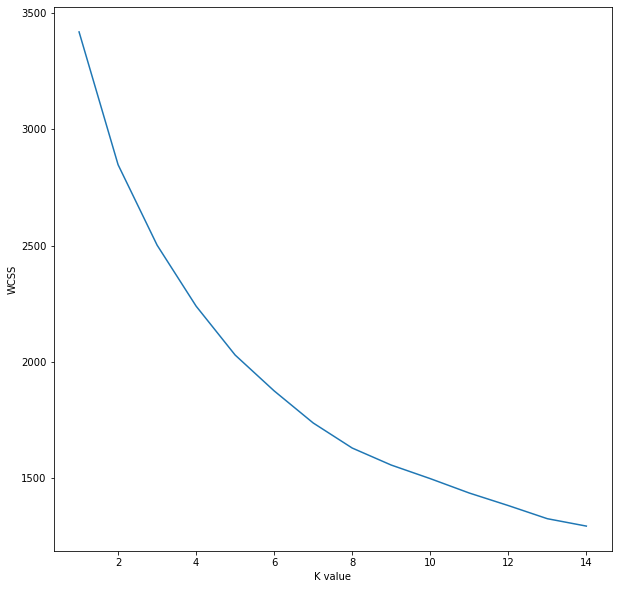

In [160]:
from sklearn.cluster import KMeans
wcss1 = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(XE_scaled)
    wcss1.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss1)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

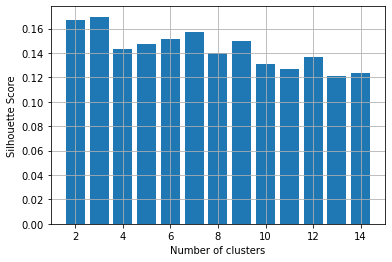

In [161]:
from sklearn.metrics import silhouette_score
silhouette_scores1 = [] 

for n_cluster in range(2,15):
    silhouette_scores1.append( 
        silhouette_score(XE_scaled, KMeans(n_clusters = n_cluster).fit_predict(XE_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores1) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [162]:
nclusters1 = 2 # this is the k in kmeans
seed1 = 0

km1 = KMeans(n_clusters=nclusters1, random_state=seed1)
km1.fit(XE_scaled)

# predict the cluster for each data point
ye_cluster_kmeans = km1.predict(XE_scaled)
ye_cluster_kmeans

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [163]:
labelE = km1.fit_predict(XE_scaled)
print(labelE)

[0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0]


In [166]:
from sklearn import metrics
score1 = metrics.silhouette_score(XE_scaled, yE_cluster_kmeans)
score1

0.16804731975988885

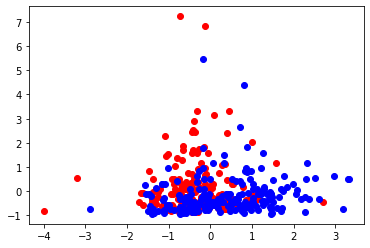

In [164]:
labelE_0 = XE_scaled[labelE == 0]
labelE_1 = XE_scaled[labelE == 1]

plt.scatter(labelE_0.iloc[:,0], labelE_0.iloc[:,1], color='red')
plt.scatter(labelE_1.iloc[:,0], labelE_1.iloc[:,1], color='blue')

In [167]:
score1 = metrics.silhouette_score(XE_scaled, ye_cluster_kmeans)
score1

0.16560989808457524

In [168]:
contingency_matrix2 = metrics.cluster.contingency_matrix(yE_cluster_kmeans,yE_cluster_kmeans)
contingency_matrix2

array([[173,   0,   0],
       [  0, 187,   0],
       [  0,   0,  20]])

In [169]:
np.amax(contingency_matrix2, axis=0)

array([173, 187,  20])

In [170]:
xe = np.sum(np.amax(contingency_matrix2, axis=0)) #Sum of max. elements from each row
xe

380

In [171]:
ye = np.sum(contingency_matrix2)  #total sum of all elements in contingency matrix
ye

380

In [172]:
purity = float(xe)/float(ye) 
purity

1.0

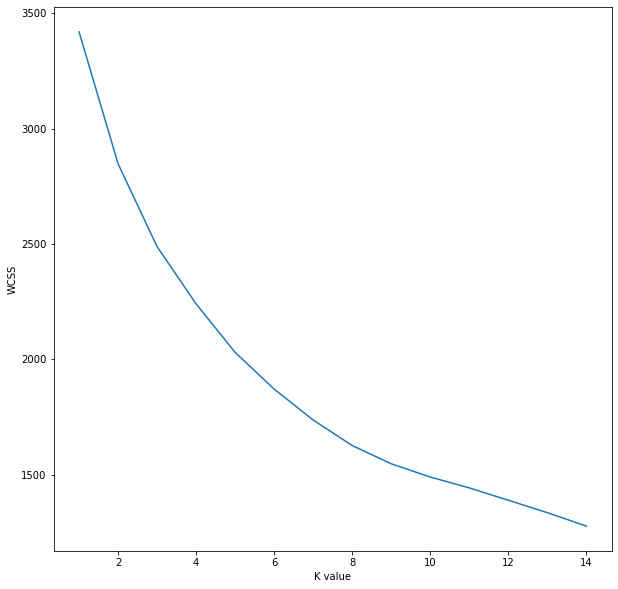

In [173]:
from sklearn.cluster import KMeans
wcss1 = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(XE_scaled)
    wcss1.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss1)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

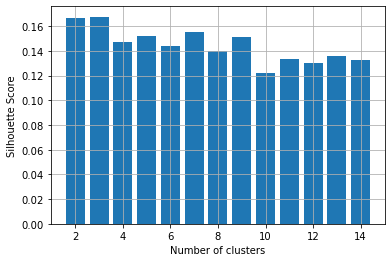

In [174]:
from sklearn.metrics import silhouette_score
silhouette_scores1 = [] 

for n_cluster in range(2,15):
    silhouette_scores1.append( 
        silhouette_score(XE_scaled, KMeans(n_clusters = n_cluster).fit_predict(XE_scaled))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores1) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show() 

In [175]:
nclusters1 = 2 # this is the k in kmeans
seed1 = 0

km1 = KMeans(n_clusters=nclusters1, random_state=seed1)
km1.fit(XE_scaled)

# predict the cluster for each data point
ye_cluster_kmeans = km1.predict(XE_scaled)
ye_cluster_kmeans

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [176]:
labelE = km1.fit_predict(XE_scaled)
print(labelE)

[0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1
 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1
 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 0]


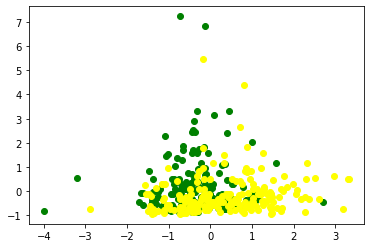

In [177]:
labelE_0 = XE_scaled[labelE == 0]
labelE_1 = XE_scaled[labelE == 1]

plt.scatter(labelE_0.iloc[:,0], labelE_0.iloc[:,1], color='green')
plt.scatter(labelE_1.iloc[:,0], labelE_1.iloc[:,1], color='yellow')

In [178]:
score1 = metrics.silhouette_score(XE_scaled, ye_cluster_kmeans)
score1

0.16560989808457524

In [179]:
km1.inertia_

2848.429045839205

In [188]:
km1.cluster_centers_

array([[-0.37778602,  0.17315618,  0.22840835,  0.62183677,  0.72000726,
         0.29002265,  0.22007266,  0.44971937,  0.39299453],
       [ 0.35093828, -0.16085066, -0.21217629, -0.57764532, -0.66883923,
        -0.26941191, -0.20443297, -0.41775961, -0.36506598]])